The likelyhood of getting diabetes is altered by a number of factors including:

- Age
- Ethnicity
- Family History
- Weight
- Physical Inactivity
- Genetics
- Other Conditions: High blood pressure, high cholesterol, and heart disease increase the risk

To explore this data I will be using synthetic patients records from [SynthericMass](https://synthea.mitre.org/) using a community version of a FHIR enabled Data Platform from Intersystems called IRIS [Intersystems Open Exchange - iris-fhir-template](https://openexchange.intersystems.com/package/iris-fhir-template).
These examples are based on US population demographics and will also use a mix of LOINC and SNOMED coding, so codes used are likely to differ from UK based systems which predominantly use SNOMED CT UK Edition.

In [9]:
import iris
import pandas as pd

host = "localhost"
# this is the superserver port
port = 32782
namespace = "FHIRSERVER"
user = "_SYSTEM"
password = "SYS"

conn = iris.connect(
    hostname=host,
    port=port,
    namespace=namespace,
    username=user,
    password=password
)

# create a cursor
cursor = conn.cursor()

sql = """
      select patient._id, patient.KEY, DATEDIFF('year',birthdate,$HOROLOG) as AGE,
             case gender
                 when 'male' then 1
                 when 'female' then 2
                 when 'other' then 0
                 else 9
                 end as clinicalGender,
             IFNULL(diabetes._id,0,1) as TYPE2DIABETES,
             IFNULL(hypertension._id,0,1) as HYPERTENSION
      from HSFHIR_X0001_S.Patient patient
       left outer join HSFHIR_X0001_S.Condition diabetes on patient.Key = diabetes.patient and diabetes.code [ '44054006'
       left outer join HSFHIR_X0001_S.Condition hypertension on patient.Key = hypertension.patient and hypertension.code [ '59621000'
      """

cursor.execute(sql)
data = cursor.fetchall()
column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns=column_names)

print(df.describe())

               AGE  clinicalGender  TYPE2DIABETES  HYPERTENSION
count  2387.000000     2387.000000    2387.000000   2387.000000
mean     47.628404        1.501466       0.068705      0.250524
std      27.336157        0.500103       0.253006      0.433405
min       0.000000        1.000000       0.000000      0.000000
25%      25.000000        1.000000       0.000000      0.000000
50%      48.000000        2.000000       0.000000      0.000000
75%      67.000000        2.000000       0.000000      1.000000
max     111.000000        2.000000       1.000000      1.000000


clinicalGender
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
Name: AGE, dtype: object

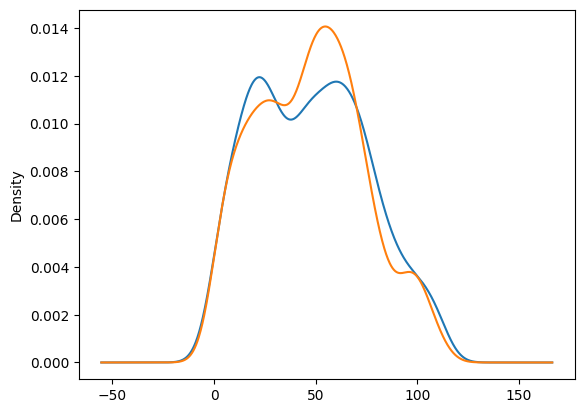

In [12]:
df.groupby('clinicalGender').AGE.plot(kind='kde')

clinicalGender
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
Name: AGE, dtype: object

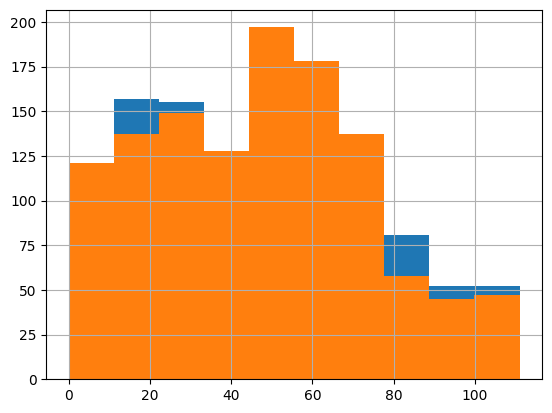

In [13]:
df.groupby('clinicalGender').AGE.hist()